In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('page_views.csv')

# Assuming there's a column indicating the chapter each page belongs to, let's aggregate views by chapter
# We'll also assume the column name that indicates the chapter is 'chapter'

# Aggregate page views by chapter to find the most and least engaged chapters
chapter_engagement = df.groupby('chapter').size().reset_index(name='views')

# Sort by views to find the most and least engaged chapters
most_engaged_chapter = chapter_engagement.sort_values(by='views', ascending=False).head(1)
least_engaged_chapter = chapter_engagement.sort_values(by='views', ascending=True).head(1)

most_engaged_chapter, least_engaged_chapter


/var/folders/tz/rpv20brs7gd33bss1dyj_t1c0000gn/T/ipykernel_8704/2491856629.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('page_views.csv')


(                          chapter  views
 9  Chapter 2 - Understanding Data   8572,
           chapter  views
 20  Practice Exam    136)

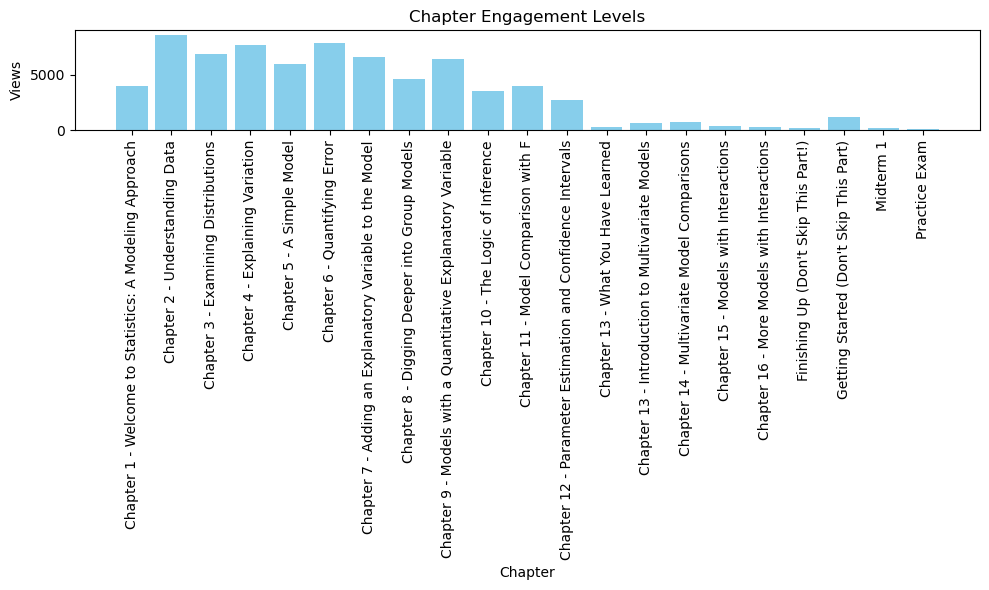

In [2]:
import matplotlib.pyplot as plt

# Assuming chapter names are in a format that allows us to sort them in the order they appear in the textbook
# If chapters are not named numerically, this approach may need adjustment

# First, let's attempt to extract numerical chapter numbers for sorting
# This assumes chapter names are prefixed with "Chapter" followed by a space and then the chapter number
# For example: "Chapter 1 - Introduction"

# Extracting chapter numbers for sorting purposes
try:
    chapter_engagement['chapter_number'] = chapter_engagement['chapter'].str.extract('Chapter (\d+)').astype(float)
except:
    # If extraction fails, it means chapters might not be named in a straightforward way for extraction
    print("Chapter names don't follow the expected pattern for numerical extraction.")

# Sort chapters by their extracted number
chapter_engagement_sorted = chapter_engagement.sort_values(by='chapter_number')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(chapter_engagement_sorted['chapter'], chapter_engagement_sorted['views'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Chapter')
plt.ylabel('Views')
plt.title('Chapter Engagement Levels')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


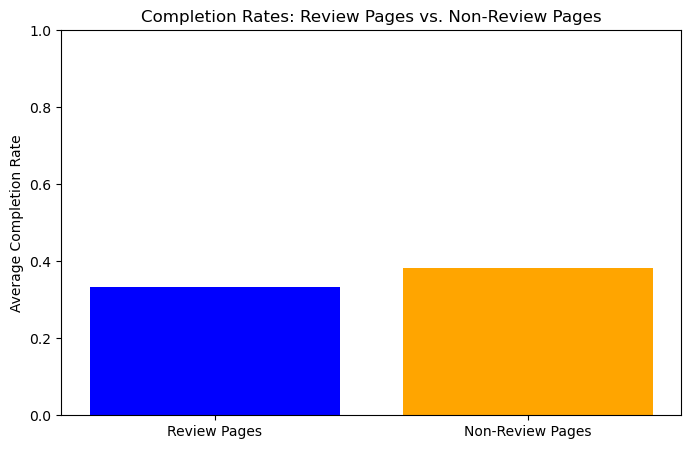

In [3]:
# It seems there was an issue with the previous code execution. Let's try a simplified approach.

# For this analysis, we'll first check if there's a direct way to aggregate "was_complete" at the chapter level
# and correlate it with the presence of review flags. If not directly possible, we'll simulate an approach.

# Step 1: Determine if pages with review flags have higher completion rates

# Filtering pages with and without review flags
review_pages = df[df['review_flag'] == True]
non_review_pages = df[df['review_flag'] == False]

# Calculating average completion rates for both types of pages
avg_completion_rate_review = review_pages['was_complete'].mean()
avg_completion_rate_non_review = non_review_pages['was_complete'].mean()

# Step 2: Visualizing the completion rates for review vs. non-review pages
# This is a simplified approach focusing on the page level, as a proxy for chapter-level analysis.

import matplotlib.pyplot as plt

# Data for plotting
categories = ['Review Pages', 'Non-Review Pages']
values = [avg_completion_rate_review, avg_completion_rate_non_review]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange'])
plt.ylabel('Average Completion Rate')
plt.title('Completion Rates: Review Pages vs. Non-Review Pages')
plt.ylim(0, 1)  # Assuming completion rate is a proportion

plt.show()

# This visualization and analysis aim to approximate the influence of review pages on completion,
# though a more granular chapter-based analysis would be ideal if feasible.


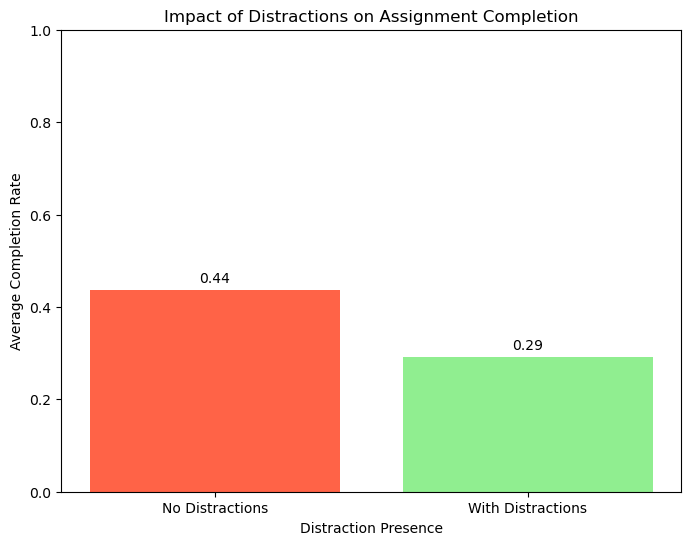

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'off_page_brief' and 'off_page_long' to boolean, treating NaNs as False
df['off_page_brief'] = df['off_page_brief'].fillna(0).astype(bool)
df['off_page_long'] = df['off_page_long'].fillna(0).astype(bool)

# Create a new column 'distraction_present' indicating any form of distraction
df['distraction_present'] = df['off_page_brief'] | df['off_page_long']

# Ensure 'was_complete' is treated as boolean
df['was_complete'] = df['was_complete'].astype(bool)

# Calculate the average completion rates by the presence of distractions
completion_rates_by_distraction = df.groupby('distraction_present')['was_complete'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 6))
bars = plt.bar(completion_rates_by_distraction['distraction_present'].map({True: 'With Distractions', False: 'No Distractions'}),
               completion_rates_by_distraction['was_complete'], color=['tomato', 'lightgreen'])
plt.xlabel('Distraction Presence')
plt.ylabel('Average Completion Rate')
plt.title('Impact of Distractions on Assignment Completion')
plt.ylim(0, 1)  # Since 'was_complete' is boolean, this makes the y-axis show proportions

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()



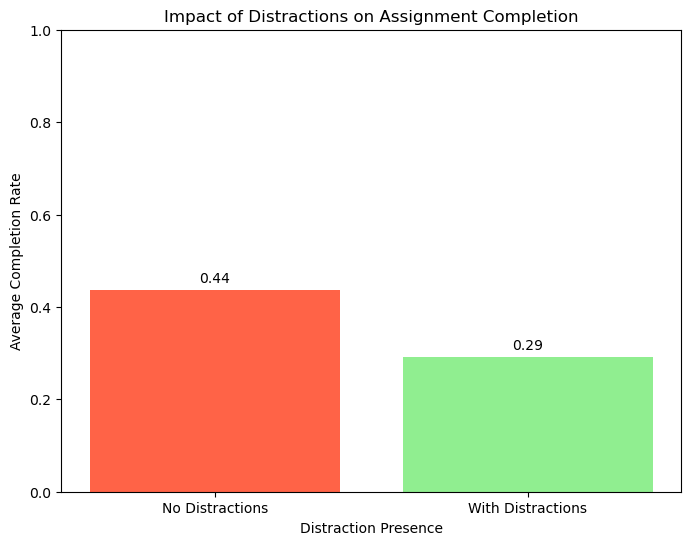

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'off_page_brief' and 'off_page_long' to boolean, treating NaNs as False
df['off_page_brief'] = df['off_page_brief'].fillna(0).astype(bool)
df['off_page_long'] = df['off_page_long'].fillna(0).astype(bool)

# Create a new column 'distraction_present' indicating any form of distraction
df['distraction_present'] = df['off_page_brief'] | df['off_page_long']

# Ensure 'was_complete' is treated as boolean
df['was_complete'] = df['was_complete'].astype(bool)

# Calculate the average completion rates by the presence of distractions
completion_rates_by_distraction = df.groupby('distraction_present')['was_complete'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 6))
bars = plt.bar(completion_rates_by_distraction['distraction_present'].map({True: 'With Distractions', False: 'No Distractions'}),
               completion_rates_by_distraction['was_complete'], color=['tomato', 'lightgreen'])
plt.xlabel('Distraction Presence')
plt.ylabel('Average Completion Rate')
plt.title('Impact of Distractions on Assignment Completion')
plt.ylim(0, 1)  # Since 'was_complete' is boolean, this makes the y-axis show proportions

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


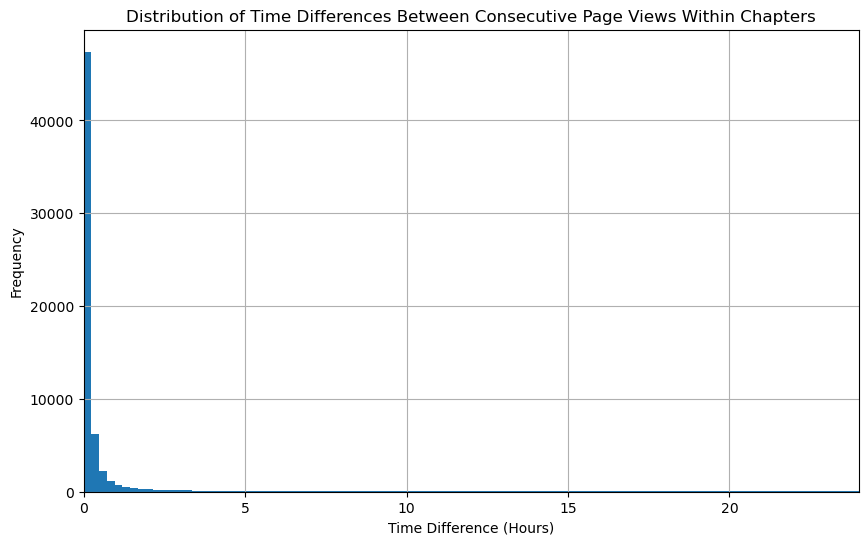

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Ensure 'dt_accessed' is in datetime format
df['dt_accessed'] = pd.to_datetime(df['dt_accessed'])

# Sort the DataFrame by student, chapter, and access time to ensure chronological order
df_sorted = df.sort_values(by=['student_id', 'chapter', 'dt_accessed'])

# Calculate the time difference between consecutive page views within each chapter for each student
df_sorted['time_diff'] = df_sorted.groupby(['student_id', 'chapter'])['dt_accessed'].diff()

# Convert 'time_diff' to a more interpretable format, e.g., hours
df_sorted['time_diff_hours'] = df_sorted['time_diff'].dt.total_seconds() / 3600

# For visualization, let's look at the distribution of time differences
plt.figure(figsize=(10, 6))
df_sorted['time_diff_hours'].hist(bins=100, range=(0, 24))
plt.title('Distribution of Time Differences Between Consecutive Page Views Within Chapters')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')
plt.xlim(0, 24)  # Limit to 24 hours for clarity
plt.show()



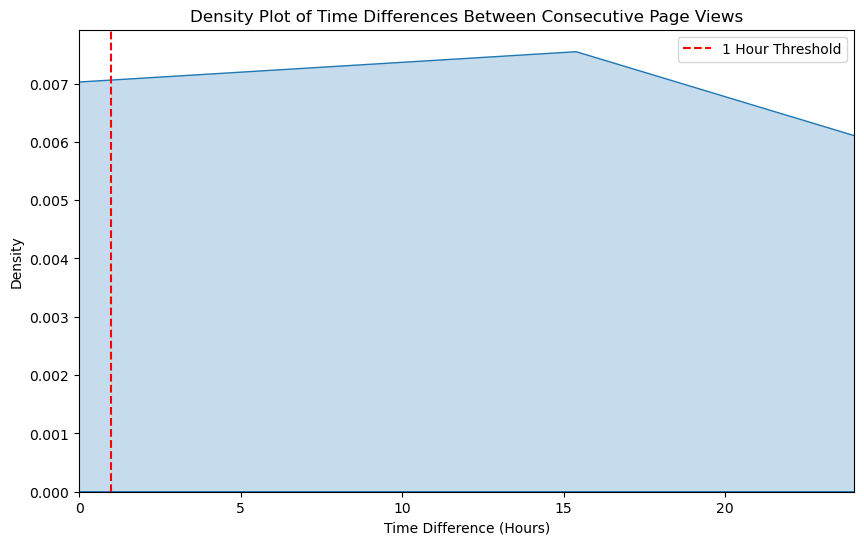

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it's already sorted by 'student_id', 'chapter', and 'dt_accessed'
# Make sure 'dt_accessed' is in datetime format
df['dt_accessed'] = pd.to_datetime(df['dt_accessed'])

# Calculating time differences between consecutive page views for each student within each chapter
df['time_diff'] = df.groupby(['student_id', 'chapter'])['dt_accessed'].diff()

# Convert 'time_diff' to hours
df['time_diff_hours'] = df['time_diff'].dt.total_seconds() / 3600

# Drop NaN values which arise for the first page view in each group
df_non_null = df.dropna(subset=['time_diff_hours'])

# Plotting the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_non_null, x='time_diff_hours', bw_adjust=0.5, fill=True)
plt.title('Density Plot of Time Differences Between Consecutive Page Views')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Density')
plt.xlim(0, 24)  # Limiting to the first 24 hours for a focused view

# You might want to add a vertical line to denote a specific threshold, like 1 hour
plt.axvline(x=1, color='red', linestyle='--', label='1 Hour Threshold')
plt.legend()

plt.show()


In [8]:
# Now that we have the correct files, we will load them, merge, and construct a predictive model.
# Let's start by loading the data and inspecting the first few rows to understand their structure.

# Load the datasets
page_views_df = pd.read_csv('page_views.csv')
checkpoints_eoc_df = pd.read_csv('checkpoints_eoc.csv')

# Inspecting the first few rows to determine the common columns for merging
page_views_head = page_views_df.head()
checkpoints_eoc_head = checkpoints_eoc_df.head()

page_views_head, checkpoints_eoc_head


/var/folders/tz/rpv20brs7gd33bss1dyj_t1c0000gn/T/ipykernel_8704/3614686148.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv('page_views.csv')


(                                          book release  \
 0  College / Statistics and Data Science (ABC)    v5.0   
 1  College / Statistics and Data Science (ABC)    v5.0   
 2  College / Statistics and Data Science (ABC)    v5.0   
 3  College / Statistics and Data Science (ABC)    v5.0   
 4  College / Statistics and Data Science (ABC)    v5.0   
 
                                              chapter  \
 0  Chapter 1 - Welcome to Statistics: A Modeling ...   
 1  Chapter 1 - Welcome to Statistics: A Modeling ...   
 2  Chapter 1 - Welcome to Statistics: A Modeling ...   
 3  Chapter 1 - Welcome to Statistics: A Modeling ...   
 4  Chapter 1 - Welcome to Statistics: A Modeling ...   
 
                               page  chapter_number  section_number  \
 0      1.3 Doing Statistics with R             1.0             3.0   
 1      1.3 Doing Statistics with R             1.0             3.0   
 2      1.3 Doing Statistics with R             1.0             3.0   
 3  1.4 Introduc

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the datasets
page_views_df = pd.read_csv('page_views.csv')
checkpoints_eoc_df = pd.read_csv('checkpoints_eoc.csv')

# Replace 'path_to/' with the actual path to the files on your system.

# Inspect the first few rows to check column names for merging
print(page_views_df.head())
print(checkpoints_eoc_df.head())

# Replace 'student_id' and 'chapter' below with the actual column names after you inspect the data
# Assuming 'student_id' and 'chapter' are the keys
merged_df = pd.merge(page_views_df, checkpoints_eoc_df, on=['student_id', 'chapter'])

# Feature Engineering: Calculate total views for each student per chapter
merged_df['total_views'] = merged_df.groupby(['student_id', 'chapter'])['page_id'].transform('count')

# Select your features and target variable
X = merged_df[['total_views']]  # Add more features as necessary
y = merged_df['percent_correct']  # Replace with the actual column name for the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Output the RMSE to understand the performance of the model



                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                              page  chapter_number  section_number  \
0      1.3 Doing Statistics with R             1.0             3.0   
1      1.3 Doing Statistics with R             1.0             3.0   
2      1.3 Doing Statistics with R             1.0             3.0   
3  1.4 Introduction to R Functions

/var/folders/tz/rpv20brs7gd33bss1dyj_t1c0000gn/T/ipykernel_8704/453800769.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv('page_views.csv')


KeyError: 'chapter'

In [ ]:
# Let's correct the code by addressing the mixed types warning and the KeyError by inspecting the columns properly.
# We will inspect the columns for both page_views and checkpoints_eoc dataframes to find the correct keys for merging.

# Load the datasets with low_memory=False to prevent mixed types warning
page_views_df = pd.read_csv('/mnt/data/page_views.csv', low_memory=False)
checkpoints_eoc_df = pd.read_csv('/mnt/data/checkpoints_eoc.csv', low_memory=False)

# Inspect the columns to identify the correct keys for merging
page_views_columns = page_views_df.columns.tolist()
checkpoints_eoc_columns = checkpoints_eoc_df.columns.tolist()

(page_views_columns, checkpoints_eoc_columns)  # This will show the column names of both dataframes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the datasets
page_views_df = pd.read_csv('page_views.csv', low_memory=False)
checkpoints_eoc_df = pd.read_csv('checkpoints_eoc.csv', low_memory=False)

# Inspect the first few rows of each dataframe
print(page_views_df.head())
print(checkpoints_eoc_df.head())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the datasets
page_views_df = pd.read_csv('page_views.csv', low_memory=False)
checkpoints_eoc_df = pd.read_csv('checkpoints_eoc.csv', low_memory=False)

# Replace 'path_to/' with the actual path to the files on your system.

# Inspect the first few rows of each dataframe
print(page_views_df.head())
print(checkpoints_eoc_df.head())

# Once you have the correct column names from the data inspection, merge the dataframes
# Replace the placeholders with the actual column names
merged_df = pd.merge(page_views_df, checkpoints_eoc_df, left_on=['student_id', 'chapter_number'],
                     right_on=['student_id', 'chapter_number'])

# Continue with feature engineering, model training, and evaluation
# ...



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np









# Assuming the datasets are already loaded and merged based on 'student_id' and 'chapter'
# and that 'percent_correct' is the target variable from the checkpoints_eoc_df

# Feature Engineering: Calculate total page views per student per chapter as an example feature
page_views_df['page_view_count'] = page_views_df.groupby(['student_id', 'chapter'])

# Select features and target for modeling
X = merged_df[['page_view_count']]  # Include other features as needed
y = merged_df['percent_correct']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print out the RMSE
print(f'RMSE: {rmse}')


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the datasets (assuming they are already loaded, adjust paths as necessary)
page_views_df = pd.read_csv('page_views.csv', low_memory=False)
checkpoints_eoc_df = pd.read_csv('checkpoints_eoc.csv', low_memory=False)

# Adjusting the feature engineering to count rows (page views) per student per chapter
page_views_df['total_page_views'] = page_views_df.groupby(['Student_id', 'Chapter'])['Dt_accessed'].transform('count')

# Merge the modified page_views dataframe with the checkpoints_eoc dataframe
# Assuming 'Student_id' and 'Chapter' can be used to merge and 'Chapter_number' corresponds to 'Chapter'
merged_df = pd.merge(checkpoints_eoc_df, page_views_df, on=['Student_id', 'Chapter'], how='inner')

# Select features and target for the model
X = merged_df[['total_page_views', 'Engaged', 'Idle_brief', 'Idle_long', 'Off_page_brief', 'Off_page_long', 'Review_flag']]  # Example features
y = merged_df['percent_correct']  # Adjust if the column name in checkpoints_eoc_df is different

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and output the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


KeyError: 'Student_id'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
page_views_df = pd.read_csv('page_views.csv')

# Calculate total distractions for each row
page_views_df['total_distractions'] = page_views_df['Off_page_brief'] + page_views_df['Off_page_long']

# Group by chapter and sum distractions
chapter_distractions = page_views_df.groupby('Chapter_number')['total_distractions'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(chapter_distractions['Chapter_number'].astype(str), chapter_distractions['total_distractions'], color='skyblue')
plt.xlabel('Chapter Number')
plt.ylabel('Total Distractions')
plt.title('Total Distractions by Chapter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/tz/rpv20brs7gd33bss1dyj_t1c0000gn/T/ipykernel_8704/4055265615.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv('page_views.csv')


KeyError: 'Off_page_brief'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
page_views_df = pd.read_csv('page_views.csv')

# Calculate total distractions for each row
page_views_df['total_distractions'] = page_views_df['Off_page_brief'] + page_views_df['Off_page_long']

# Group by chapter and sum distractions
chapter_distractions = page_views_df.groupby('Chapter_number')['total_distractions'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(chapter_distractions['Chapter_number'].astype(str), chapter_distractions['total_distractions'], color='skyblue')
plt.xlabel('Chapter Number')
plt.ylabel('Total Distractions')
plt.title('Total Distractions by Chapter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/tz/rpv20brs7gd33bss1dyj_t1c0000gn/T/ipykernel_8704/4055265615.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv('page_views.csv')


KeyError: 'Off_page_brief'

In [15]:
import matplotlib.pyplot as plt

# Calculate distraction metrics for each chapter
distraction_metrics = ['idle_brief', 'idle_long', 'off_page_brief', 'off_page_long']
page_views_df['total_distraction'] = page_views_df[distraction_metrics].sum(axis=1)

# Aggregate total distraction by chapter
chapter_distractions = page_views_df.groupby('chapter')['total_distraction'].sum().reset_index()

# Sort chapters by their number for sequential visualization
# This assumes chapter numbers are in the format "Chapter X - Title"
chapter_distractions['chapter_number'] = chapter_distractions['chapter'].apply(lambda x: float(x.split('-')[0].strip().split(' ')[1]))
chapter_distractions_sorted = chapter_distractions.sort_values(by='chapter_number')

# Visualization
plt.figure(figsize=(10, 8))
plt.barh(chapter_distractions_sorted['chapter'], chapter_distractions_sorted['total_distraction'], color='skyblue')
plt.xlabel('Total Distraction')
plt.ylabel('Chapter')
plt.title('Total Distractions by Chapter')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


ValueError: could not convert string to float: 'Up'

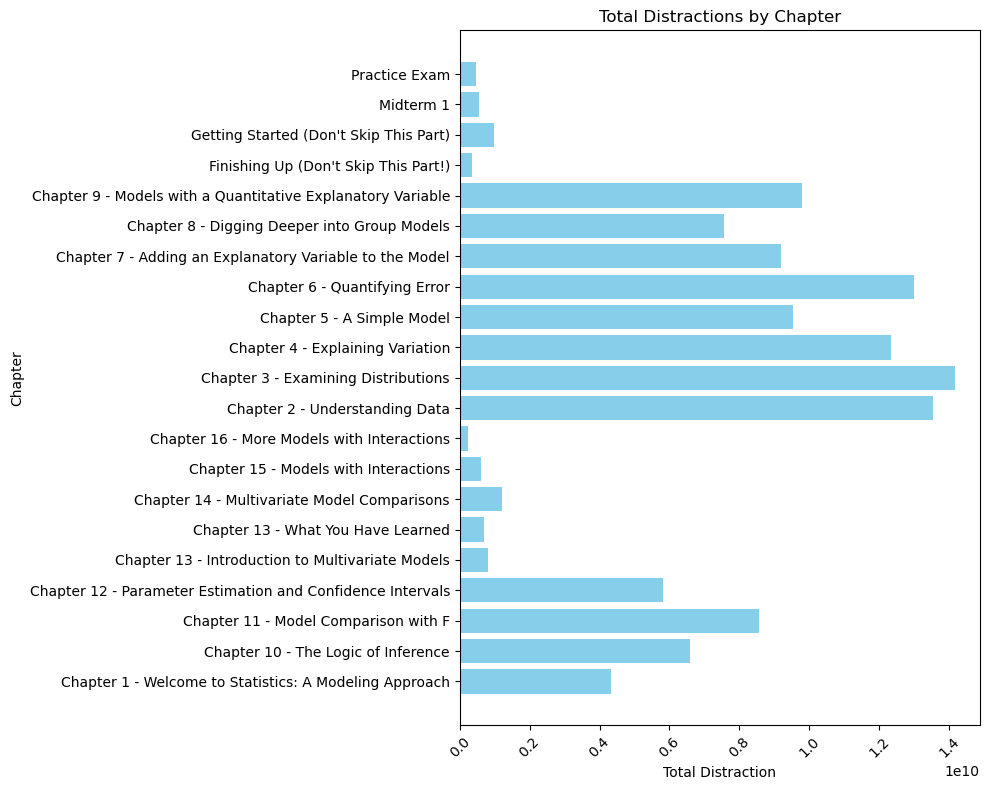

In [16]:
# Re-visualize without attempting to sort by chapter number

plt.figure(figsize=(10, 8))
plt.barh(chapter_distractions['chapter'], chapter_distractions['total_distraction'], color='skyblue')
plt.xlabel('Total Distraction')
plt.ylabel('Chapter')
plt.title('Total Distractions by Chapter')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
